In [160]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import log_loss

In [161]:
#read the file
#script_df = pd.read_csv('longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')
#medical_df = pd.read_csv('longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')

/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Exploratory Data Analysis (EDA)

In [162]:
# create copies
script_df_copy = script_df
medical_df_copy = medical_df

In [163]:
script_df = script_df_copy
medical_df = medical_df_copy

In [164]:
script_df.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,...,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,65862059805,True,190001,None


In [165]:
script_df.shape #structure of the script_data

(894623, 48)

In [166]:
script_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894623 non-null  object 
 6   patient_dob                    894623 non-null  object 
 7   pharmacy_npi                   894623 non-null  object 
 8   pharmacist_npi                 894623 non-null  object 
 9   prescriber_npi                 894623 non-null  object 
 10  primary_care_npi               894623 non-null  object 
 11  group_id                       894623 non-null  object 
 12  date_of_service               

In [167]:
script_df.describe() #summarizing key stats

,cohort_id,ndc11,number_of_refills_authorized,quantity_prescribed_original,quantity_dispensed,fill_number,days_supply,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,plan_pay,ndc,start_date
count,894623.000000,8.946230e+05,849519.000000,322348.00000,8.946160e+05,894623.000000,894623.000000,5.0,7.850810e+05,601820.000000,411383.000000,491878.000000,8.946230e+05,894623.000000
mean,16.065902,3.913810e+10,2.496945,11.03221,7.151479e+01,0.855659,41.070293,99.0,4.547052e+02,10.890529,7.075289,167.327912,3.913810e+10,190740.803998
std,0.248110,2.808575e+10,6.861014,85.75864,3.589294e+03,1.600734,29.708626,0.0,4.805967e+04,96.639674,59.716082,802.330352,2.808575e+10,2830.185124
min,16.000000,2.143301e+06,-1.000000,0.00000,0.000000e+00,0.000000,0.000000,99.0,-7.370000e+00,-189.700000,-3198.400000,-1458.620000,2.143301e+06,190001.000000
25%,16.000000,9.046999e+08,0.000000,0.00000,3.000000e+01,0.000000,30.000000,99.0,2.799000e+01,0.000000,0.000000,2.290000,9.046999e+08,190001.000000
50%,16.000000,4.948305e+10,1.000000,0.00000,3.000000e+01,0.000000,30.000000,99.0,9.526000e+01,0.000000,1.350000,13.580000,4.948305e+10,190001.000000
75%,16.000000,6.586206e+10,3.000000,0.00000,9.000000e+01,1.000000,50.000000,99.0,3.220600e+02,4.000000,4.150000,36.300000,6.586206e+10,190001.000000
max,17.000000,9.920701e+10,99.000000,10000.00000,3.390291e+06,99.000000,999.000000,99.0,4.252220e+07,25598.020000,6923.160000,50307.120000,9.920701e+10,202308.000000


In [168]:
# percent of data missing
cols_to_drop=[]
def display_missing_perc(df):    
    for col in df.columns.tolist():       
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(script_df)

journey_id column missing values: 0.0
cohort_id column missing values: 0.0
claim_id column missing values: 0.0
patient_gender column missing values: 0.0
patient_state column missing values: 0.0
patient_zip column missing values: 0.0
patient_dob column missing values: 0.0
pharmacy_npi column missing values: 0.0
pharmacist_npi column missing values: 0.0
prescriber_npi column missing values: 0.0
primary_care_npi column missing values: 0.0
group_id column missing values: 0.0
date_of_service column missing values: 0.0
date_authorized column missing values: 0.0
transaction_type column missing values: 0.0
date_prescription_written column missing values: 0.0
ndc11 column missing values: 0.0
ndc11_original column missing values: 0.0
number_of_refills_authorized column missing values: 5.04167677334475
diagnosis_code column missing values: 9.003569101174461
diagnosis_code_type column missing values: 0.0
quantity_prescribed_original column missing values: 63.968286082517444
quantity_dispensed colu

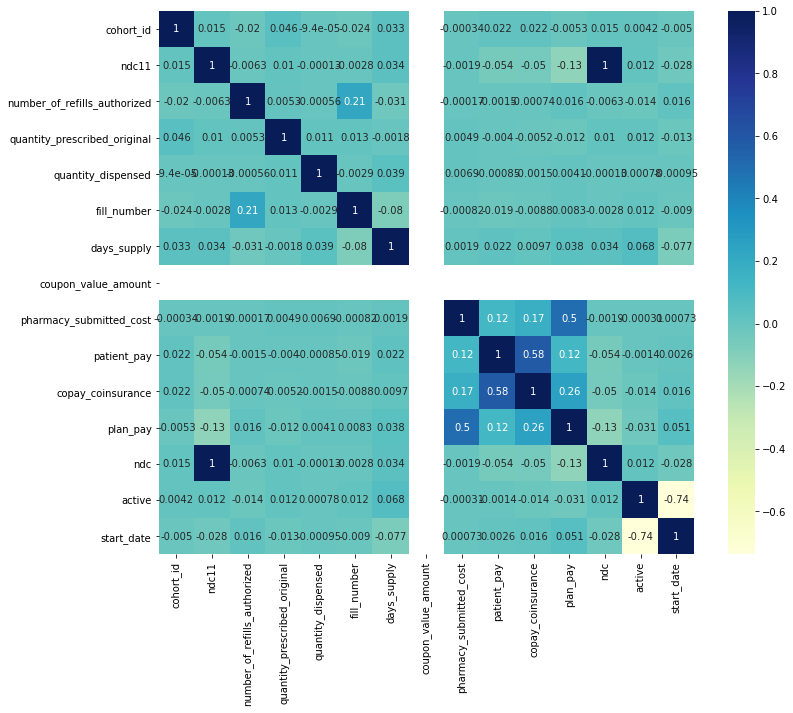

In [169]:
#Making a correlation chart to see relation between all types of data points to investigate. 
plt.figure(figsize=(12, 10)) #corr matrix
sns.heatmap(script_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### The correlation plot shows in one glance the relation between all the variables, The pharmacy and payments and pay_plan have positive correlation. I find the ndc and ndc11 have perfect correlation. This help us investigate further, are they representing the same factor. 

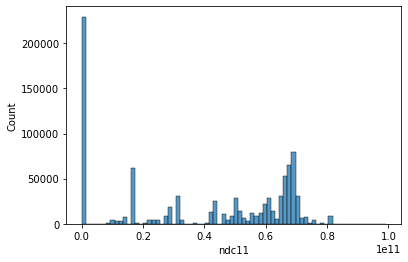

In [170]:
sns.histplot(data=script_df, x='ndc11')
plt.show()
# ndc11

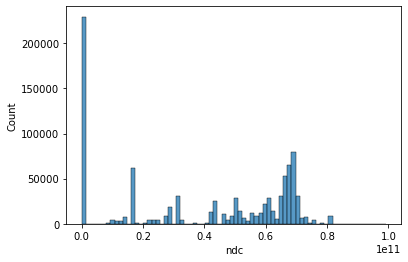

In [171]:
sns.histplot(data=script_df, x='ndc')
plt.show()
# ndc

### After looking both ndc and ndc11 are the very similar in nature, it helps me to understand how to do variable selection. 

In [173]:
medical_df.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [174]:
medical_df.shape #structure of the medical_data

(623525, 34)

In [175]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623525 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [176]:
medical_df.describe() #summarizing key stats

,patient_short_zip,patient_age,ref_npi,hcp_npi,hco_npi,rev_center_code,rev_center_units,proc_units,line_charge,claim_charge,smart_allowed
count,623512.000000,616980.000000,2.975010e+05,4.346530e+05,6.177890e+05,113926.000000,621558.000000,621331.000000,623525.000000,623525.000000,623525.000000
mean,907.514954,59.416910,1.502083e+09,1.508734e+09,1.485095e+09,456.083449,1.243236,4.319060,482.437268,482.437268,190.295642
std,40.034735,9.946158,2.868359e+08,2.825083e+08,2.859965e+08,451.591644,2.458118,55.208116,3582.592825,3582.592825,509.339625
min,74.000000,30.000000,1.003001e+09,1.003001e+09,1.003006e+09,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,55.000000,1.255437e+09,1.265668e+09,1.245340e+09,301.000000,1.000000,1.000000,10.000000,10.000000,18.190000
50%,911.000000,60.000000,1.508952e+09,1.528016e+09,1.467631e+09,320.000000,1.000000,1.000000,70.000000,70.000000,75.230000
75%,922.000000,65.000000,1.740350e+09,1.740376e+09,1.720295e+09,521.000000,1.000000,1.000000,200.000000,200.000000,182.360000
max,999.000000,80.000000,1.992999e+09,1.993000e+09,1.992995e+09,3103.000000,730.000000,12473.000000,778750.000000,778750.000000,45035.960000


In [177]:
#look for missing values
cols_to_drop=[]
def display_missing_perc(df):    
    for col in df.columns.tolist():       
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(medical_df)

journey_id column missing values: 0.0
episode_id column missing values: 0.0
visit_id column missing values: 0.30070967483260497
encounter_id column missing values: 0.0
claim_date column missing values: 0.0
patient_state column missing values: 0.0
patient_short_zip column missing values: 0.0020849204121727275
patient_age column missing values: 1.0496772382823463
patient_gender column missing values: 0.0
place_of_service column missing values: 22.287799206126458
visit_type column missing values: 3.7000922176336153
payor column missing values: 2.3397618379375325
payor_channel column missing values: 6.004410408564211
ref_npi column missing values: 52.2872378814001
hcp_npi column missing values: 30.29100677599134
hcp_taxonomy column missing values: 31.324485786456037
hcp_specialty column missing values: 31.321278216591153
hco_npi column missing values: 0.919931037247905
hcp_npi_list column missing values: 30.29100677599134
hco_npi_list column missing values: 0.919931037247905
diag_list colu

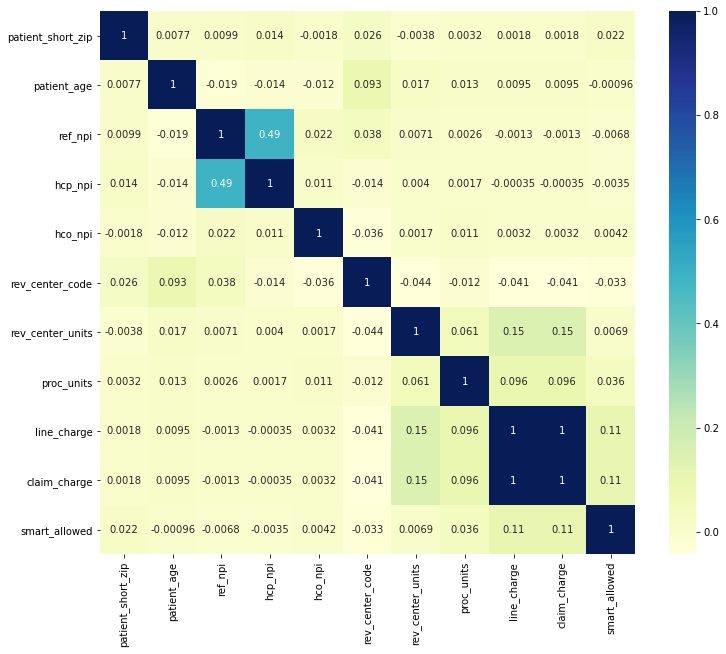

In [178]:
#Making a correaltion chart to see relation between all types of data points to investigate. 
plt.figure(figsize=(12, 10))
sns.heatmap(medical_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

###  The correlation plot helps in understanding some signficant relation between in the ref_npi and hcp_npi. In one class we can observe most values are positive correlation. We can further use this matrix to help in selecting variables.

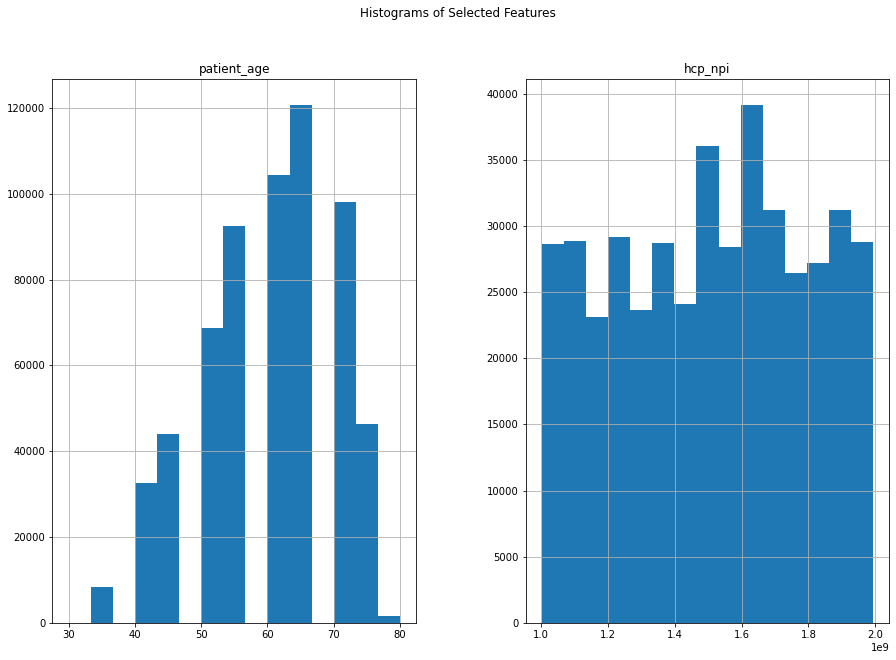

In [179]:
## Some interesting features to look at
features = ['patient_age', 'hcp_npi']
medical_df[features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Selected Features')
plt.show()

### The age is higher at the around 60 to 65 years old for the patients. The hcp_npi shows the somewhat normal districbution with spikes around the middle

In [156]:
# Select 'diag_' columns for viz
diag_columns = [col for col in medical_df.columns if col.startswith('diag_')]
medical_df_diag = medical_df[diag_columns]
combined_list = medical_df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

In [157]:
import operator
# Sort the dictionary items by count (descending order)
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

#('E11', 233629)
#('I10', 199537)
#('E78', 113939)
#('Z00', 95083)
#('E66', 69689)

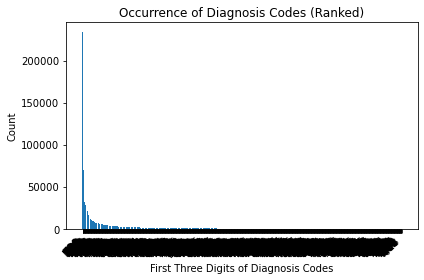

In [158]:
# Extract labels and values
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the bar chart
plt.bar(labels, values)

# Labels and title 
plt.xlabel("First Three Digits of Diagnosis Codes")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes (Ranked)")

# Optional: Rotate x labels if they are long or overlapping
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

### This chart shows a combination of all diagnoses code that have been used to detect patients health. 

In [23]:
df_zip = medical_df['patient_short_zip']
combined_list = df_zip.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]
zips = {}
for diag_code in combined_list:
    #first_three = diag_code[:3]
    zips[diag_code] = zips.get(diag_code, 0) + 1
sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

In [24]:
for items in sorted_counts[:5]:
    print(items)

(900.0, 180469)
(922.0, 166422)
(908.0, 55562)
(921.0, 51190)
(910.0, 48395)


### sorted counts for zip codes with daig_code, now we will plot them to see which state has highest patients who are in the dataset.

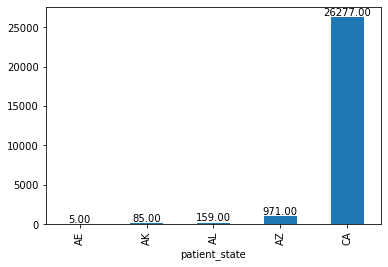

In [180]:
# Check the number of patients' states
patient_state_cnt = medical_df.groupby('patient_state')['journey_id'].nunique()
patient_state_cnt .plot.bar()
for i, v in enumerate(patient_state_cnt):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

## California makes the highest number of patients Ozempic than all the order states. It does not suprise me because Hollywood and other rich people have been under fire for using ozempic for weightloss. Instead of its real reason of curing diabetes.

In [181]:
medical_df_obesity = medical_df[medical_df['diag_1'].str.startswith("E66")|
      medical_df['diag_2'].str.startswith("E66")|
      medical_df['diag_3'].str.startswith("E66")|
      medical_df['diag_4'].str.startswith("E66")|
      medical_df['diag_5'].str.startswith("E66")]
# making a daignosis chart for patients with obesity

<ipython-input-27-a68afb3590ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_df_obesity['diag'] = "Obesity"


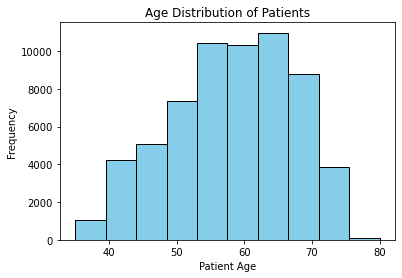

In [27]:
medical_df_obesity['diag'] = "Obesity"
patients_gender_cnt = medical_df_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

# Age distribution of patients 
plt.hist(medical_df_obesity['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

# Show the histogram
plt.show()

## The age for patients being treated is normally distrbuted, this helps us to understand the ballpark of patients. they are all most around 50s to 70s. 

(array([ 8920.,     0., 17393.,     0.,     0.,     0.,     0., 20270.,
            0., 16443.]),
 array([2019. , 2019.4, 2019.8, 2020.2, 2020.6, 2021. , 2021.4, 2021.8,
        2022.2, 2022.6, 2023. ]),
 <BarContainer object of 10 artists>)

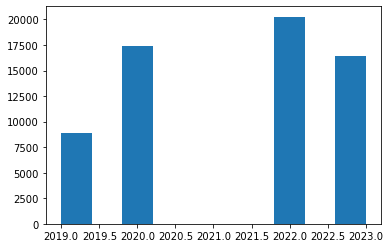

In [28]:
plt.hist(pd.to_datetime(medical_df_obesity['claim_date']).dt.year)

## Obesity pateints claim show consistenty un 2019-2020 and stop in 2020 to 2021, we are guessing COVID had some impact, but is higher in 2022-2023 maybe due to health detoriation during COVID. 

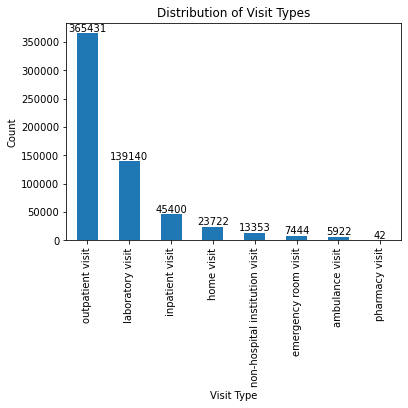

In [182]:
visit_type_counts = medical_df['visit_type'].value_counts()
ax = visit_type_counts.plot(kind='bar')
plt.xlabel('Visit Type')
plt.ylabel('Count')
plt.title('Distribution of Visit Types')
for i, v in enumerate(visit_type_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom') # Adding text for each bar

plt.show()

### Since the frequency of emergency room visits is significant, I opted to plot it; however, it is notably lower compared to outpatient visits, comprising only 7444 visits out of the entire dataset.

## Data Preprocessing and Merging:

In [183]:
0.5*script_df.shape[0]

447311.5

In [184]:
col_to_remove = script_df.columns[script_df.isna().sum()>400000]
## Handle Null values
# since we have 894623 rows, all columns with number of null values larger than 400000 (50% of all data) can be removed since there are too many nulls
script_df = script_df.drop(col_to_remove, axis = 1)

In [185]:
## clean the null values for other columns

## replace null with 0 for number_of_refills_authorized as no refills authorized
script_df.loc[script_df['number_of_refills_authorized'].isna(),
              'number_of_refills_authorized'] = 0.0

## check unique values in diagnosis_code
script_df['diagnosis_code'].unique()

# replace nulls with None
script_df.loc[script_df['diagnosis_code'].isna(),
              'diagnosis_code'] = 'None'

## check unique values in unit_of_measure
# according to the unique values of unit_of_measure, there is also an empty value of '  '
# replace null values and '  ' with None
script_df['unit_of_measure'].unique()
# replace nulls with None
script_df.loc[(script_df['unit_of_measure'].isna())|
              (script_df['unit_of_measure'] == '  '),
              'unit_of_measure'] = 'None'

## check unique values in prior_authorization_type_code
script_df['prior_authorization_type_code'].unique()
# replace nulls with None
script_df.loc[script_df['prior_authorization_type_code'].isna(),
              'prior_authorization_type_code'] = 'None'

# pharmacy_submitted_cost is a float, and it is reasonable to replace null with mean
subcost_avg = script_df['pharmacy_submitted_cost'].mean()
script_df.loc[script_df['pharmacy_submitted_cost'].isna(),
              'pharmacy_submitted_cost'] = subcost_avg

# patient_pay is a float, and it is reasonable to replace null with mean
PatientPay_avg = script_df['patient_pay'].mean()
script_df.loc[script_df['patient_pay'].isna(),
              'patient_pay'] = PatientPay_avg

# quantity_dispensed and pcn only has 7 and 6 nulls respectively, no impact of dropping the row
script_df = script_df.loc[~script_df['quantity_dispensed'].isna()]
script_df = script_df.loc[~script_df['pcn'].isna()]

In [32]:
# check null values, no null
script_df.isna().sum()

journey_id                       0
cohort_id                        0
claim_id                         0
patient_gender                   0
patient_state                    0
patient_zip                      0
patient_dob                      0
pharmacy_npi                     0
pharmacist_npi                   0
prescriber_npi                   0
primary_care_npi                 0
group_id                         0
date_of_service                  0
date_authorized                  0
transaction_type                 0
date_prescription_written        0
ndc11                            0
ndc11_original                   0
number_of_refills_authorized     0
diagnosis_code                   0
diagnosis_code_type              0
quantity_dispensed               0
place_of_service                 0
is_service                       0
level_of_service                 0
fill_number                      0
days_supply                      0
unit_of_measure                  0
prior_authorization_

In [33]:
# keep only the columns we need, patients background information are included in the medical_df
script_df = script_df.loc[:,('journey_id','cohort_id','ndc','diagnosis_code',
                             'diagnosis_code_type','quantity_dispensed','days_supply',
                             'number_of_refills_authorized','fill_number',
                             'is_compound_drug')]

In [34]:
# clean medical_df
medical_df.isna().sum()

journey_id                0
episode_id                0
visit_id               1875
encounter_id              0
claim_date                0
patient_state             0
patient_short_zip        13
patient_age            6545
patient_gender            0
place_of_service     138970
visit_type            23071
payor                 14589
payor_channel         37439
ref_npi              326024
hcp_npi              188872
hcp_taxonomy         195316
hcp_specialty        195296
hco_npi                5736
hcp_npi_list         188872
hco_npi_list           5736
diag_list               870
diag_1                  870
diag_2               162930
diag_3               258241
diag_4               325292
diag_5               418509
rev_center_code      509599
rev_center_units       1967
proc_code             23913
proc_modifier        457577
proc_units             2194
line_charge               0
claim_charge              0
smart_allowed             0
dtype: int64

In [35]:
medical_df.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [36]:
# keep only relevant variables that can help control treatment effect
medical_df = medical_df.loc[:,('journey_id','episode_id','claim_date','patient_state','patient_short_zip',
                'patient_age','patient_gender','diag_list','proc_code','smart_allowed')]

# filter out obese patients
# keep entry if E66 exists in diag_list
# define pattern of E66
medical_df = medical_df.loc[(medical_df['diag_list'].str.contains('E66',na = False))|
                            (medical_df['diag_list'].str.contains('I10',na = False))]

# the first ozempic get prescribed
first_oze = medical_df[medical_df['proc_code'] == 'J3490']['claim_date'].min()

# filter rows after ozempic get prescribed
medical_df = medical_df.loc[medical_df['claim_date']>first_oze]

# replace age missing value with mean
mean_age = round(medical_df['patient_age'].mean())
medical_df.loc[medical_df['patient_age'].isna(),'patient_age'] = mean_age

# drop 8 nulls in patient_short_zip
medical_df = medical_df.loc[medical_df['patient_short_zip'].isna()==False]


In [37]:
# check null values
medical_df.isna().sum()

journey_id               0
episode_id               0
claim_date               0
patient_state            0
patient_short_zip        0
patient_age              0
patient_gender           0
diag_list                0
proc_code            14507
smart_allowed            0
dtype: int64

In [38]:
## we filter the insurance claims dataset to weed. out any 
## condition other than E66|I10

#script_df['diagnosis_code'].unique()

filtered_df_e66 = script_df[script_df['diagnosis_code'].astype(str).str.contains('E66|I10')]

In [39]:
medical_df.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed
6,00006d564a4718c744f1bbf1b6c5f8c3,cfc123a94e0e7687f5970ef10298b4f3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",1159F,44.68
10,00006d564a4718c744f1bbf1b6c5f8c3,cfc123a94e0e7687f5970ef10298b4f3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",3008F,48.46
13,00006d564a4718c744f1bbf1b6c5f8c3,cfc123a94e0e7687f5970ef10298b4f3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",1160F,42.00
16,00006d564a4718c744f1bbf1b6c5f8c3,cfc123a94e0e7687f5970ef10298b4f3,2022-09-28,CA,900.0,50.0,F,"N200,I10,E039",50432,429.73
17,00006d564a4718c744f1bbf1b6c5f8c3,cad5e8635fd011bfec2b65d161b15254,2019-11-01,CA,900.0,50.0,F,"E7800,E039,I10,R809",80053,15.16


In [40]:
filtered_df_e66.head()

,journey_id,cohort_id,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug
68,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,10,30.0,30.0,1.0,0.0,False
69,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,None,30.0,30.0,0.0,0.0,None
70,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,None,30.0,30.0,0.0,3.0,None
77,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,10,30.0,30.0,1.0,2.0,False
78,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,None,30.0,30.0,0.0,4.0,None


In [41]:
## merge the 2 files
df = pd.merge(medical_df,filtered_df_e66,on='journey_id')
df.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,cohort_id,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,10,30.0,30.0,1.0,0.0,False
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,None,30.0,30.0,0.0,0.0,None
2,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,None,30.0,30.0,0.0,3.0,None
3,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,10,30.0,30.0,1.0,2.0,False
4,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,None,30.0,30.0,0.0,4.0,None


In [42]:
df.isna().sum()
# proc_code will be dropped later when the treatment dummy is created

journey_id                          0
episode_id                          0
claim_date                          0
patient_state                       0
patient_short_zip                   0
patient_age                         0
patient_gender                      0
diag_list                           0
proc_code                       17071
smart_allowed                       0
cohort_id                           0
ndc                                 0
diagnosis_code                      0
diagnosis_code_type                 0
quantity_dispensed                  0
days_supply                         0
number_of_refills_authorized        0
fill_number                         0
is_compound_drug                    0
dtype: int64

In [43]:
# create the treatment dummy from proc_code and ndc
#df['ozempic'] = np.where((df['proc_code'] == 'J3490')|
            #             (df['ndc'].astype(str).str.contains('169413')),1,0)

df['ozempic'] = np.where((df['proc_code'] == 'J3490') |
                         (df['ndc'].astype(str).str.contains('169413')) |
                         (df['ndc'].astype(str).str.contains('169418')) |
                         (df['ndc'].astype(str).str.contains('169477212')) |
                         (df['ndc'].astype(str).str.contains('50090594900')), 1, 0)

In [44]:
df['ozempic'].sum()

2265

In [45]:
# drop the few patients with gender none
df = df[df['patient_gender'] != 'None']
df.loc[df['patient_gender']=='None'].shape

(0, 20)

In [46]:
## gender dummy variable

# Map 'M' to 0 and 'F' to 1
df['gender_encoded'] = df['patient_gender'].map({'M': 0, 'F': 1})

df['gender_encoded'] = df['gender_encoded'].astype(int)

# Verify the changes
df.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,...,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug,ozempic,gender_encoded
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,10,30.0,30.0,1.0,0.0,False,0,0
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,None,30.0,30.0,0.0,0.0,None,0,0
2,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,None,30.0,30.0,0.0,3.0,None,0,0
3,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,10,30.0,30.0,1.0,2.0,False,0,0
4,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,None,30.0,30.0,0.0,4.0,None,0,0


In [47]:
# Get the first occurrence of each journey_id
first_rows = df.groupby('journey_id', as_index=False).head(1)

# Get the last occurrence of each journey_id
last_rows = df.groupby('journey_id', as_index=False).tail(1)
combined_rows = pd.concat([first_rows, last_rows])
combined_rows = combined_rows.drop_duplicates()
combined_rows = combined_rows.reset_index(drop=True)
combined_rows.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,...,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug,ozempic,gender_encoded
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,10,30.0,30.0,1.0,0.0,False,0,0
1,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",93000,77.31,...,65862078130,I10,10,90.0,90.0,0.0,0.0,False,0,0
2,000362c8cc869075f4c2b6533887d4aa,52ceb00e0607228759315e198b38cbc1,2022-09-06,CA,913.0,65.0,F,"F330,E559,E039,D649,R970,Z1231,M810,I10",3078F,56.38,...,185021101,I10,10,30.0,30.0,3.0,6.0,False,0,1
3,0004da06b6b88eb1375e7a772a1d3162,a6769061439eb72969e89f80aca8d182,2022-05-04,CA,900.0,55.0,M,"I10,E785,F419",36415,118.08,...,31722070290,I10,None,30.0,30.0,3.0,0.0,False,0,0
4,00056d0b79fda876cae788d6920c902a,3bb92ee3ff1f72d471735ba19cae0d93,2019-06-21,CA,900.0,60.0,F,"I10,N182,R7302",83036,176.76,...,65862016899,I10,10,90.0,90.0,0.0,0.0,False,0,1


In [48]:
# Sort the combined_rows DataFrame based on 'journey_id'
sorted_combined_rows = combined_rows.sort_values(by='journey_id')
sorted_combined_rows = sorted_combined_rows.reset_index(drop=True)
sorted_combined_rows.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,...,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug,ozempic,gender_encoded
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,10,30.0,30.0,1.0,0.0,False,0,0
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99396,97.77,...,31722070090,I10,None,30.0,30.0,0.0,2.0,None,0,0
2,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",1159F,44.68,...,67877019805,I10,10,90.0,90.0,0.0,0.0,False,0,0
3,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",93000,77.31,...,65862078130,I10,10,90.0,90.0,0.0,0.0,False,0,0
4,000362c8cc869075f4c2b6533887d4aa,52ceb00e0607228759315e198b38cbc1,2022-09-06,CA,913.0,65.0,F,"F330,E559,E039,D649,R970,Z1231,M810,I10",3078F,56.38,...,185021101,I10,10,30.0,30.0,3.0,6.0,False,0,1


In [49]:
# Initialize the dummy column to 0 for all rows initially
sorted_combined_rows['disease_cured'] = 0
def is_disease_cured(final_diag):
    codes_for_cure = ['E669', 'I10', 'E663']
    # Check if all specified codes are missing in the final diagnosis
    return all(code not in final_diag for code in codes_for_cure)

# Iterate through each unique journey_id
for journey_id in sorted_combined_rows['journey_id'].unique():
    # Filter rows for the current journey_id
    rows = sorted_combined_rows[sorted_combined_rows['journey_id'] == journey_id]
    
    # Assuming the DataFrame is sorted by 'claim_date', take the first and last 'diag_list' values
    final_diag = rows.iloc[-1]['diag_list']
    
    # Check if the disease is cured based on diag_list comparison
    cured = is_disease_cured(final_diag)
    
    # Update the 'disease_cured' column for all rows with the current journey_id
    sorted_combined_rows.loc[sorted_combined_rows['journey_id'] == journey_id, 'disease_cured'] = int(cured)
sorted_combined_rows.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,...,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug,ozempic,gender_encoded,disease_cured
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,I10,10,30.0,30.0,1.0,0.0,False,0,0,0
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99396,97.77,...,I10,None,30.0,30.0,0.0,2.0,None,0,0,0
2,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",1159F,44.68,...,I10,10,90.0,90.0,0.0,0.0,False,0,0,0
3,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",93000,77.31,...,I10,10,90.0,90.0,0.0,0.0,False,0,0,0
4,000362c8cc869075f4c2b6533887d4aa,52ceb00e0607228759315e198b38cbc1,2022-09-06,CA,913.0,65.0,F,"F330,E559,E039,D649,R970,Z1231,M810,I10",3078F,56.38,...,I10,10,30.0,30.0,3.0,6.0,False,0,1,0


In [50]:
len(sorted_combined_rows["ozempic"]==1)

3763

## Causal Analysis Setup

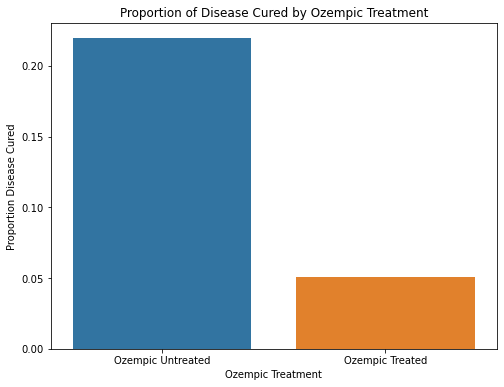

In [51]:
#looking at our relation for trement for disease cured which is y variable
ozempic_untreated = sorted_combined_rows[sorted_combined_rows['ozempic'] == 1]['disease_cured'].mean()
ozempic_treated = sorted_combined_rows[sorted_combined_rows['ozempic'] == 0]['disease_cured'].mean()
df_3 = pd.DataFrame({
    'Ozempic': ['Ozempic Untreated', 'Ozempic Treated'],
    'Proportion Disease Cured': [ozempic_untreated, ozempic_treated] 
}) # creating to see the 
plt.figure(figsize=(8, 6))
sns.barplot(x='Ozempic', y='Proportion Disease Cured', data=df_3) # Plot the bar chart
plt.title('Proportion of Disease Cured by Ozempic Treatment')
plt.ylabel('Proportion Disease Cured')
plt.xlabel('Ozempic Treatment')
plt.show()

In [52]:
df_3 #data on treavted vs untreated patients

,Ozempic,Proportion Disease Cured
0,Ozempic Untreated,0.219512
1,Ozempic Treated,0.050779


Causal inference indicates cause-and-effect connections between variables using observational data or experiment data. It aims to quantify the impact of changes in one variable on another while addressing potential biases. We use different methods, like experiments, to figure this out accurately. But with our kind of data, it's tough to be sure about cause and effect. So, we use a method called partial lasso to help us make better guesses about it.

The bar chart shows that fewer people who took Ozempic were cured compared to those who didn't. This could mean Ozempic alone might not be very good at curing the disease, or there might be other reasons. There might be a problem because the people who took Ozempic might have had more serious health issues, which could make them harder to cure.To understand this better, we need to look at factors like age, health, and other conditions people have. This will help us figure out if Ozempic really makes a difference in curing the disease.
To end, while the chart gives us some insight, we need to look deeper to understand if Ozempic is really effective in treating the disease. 

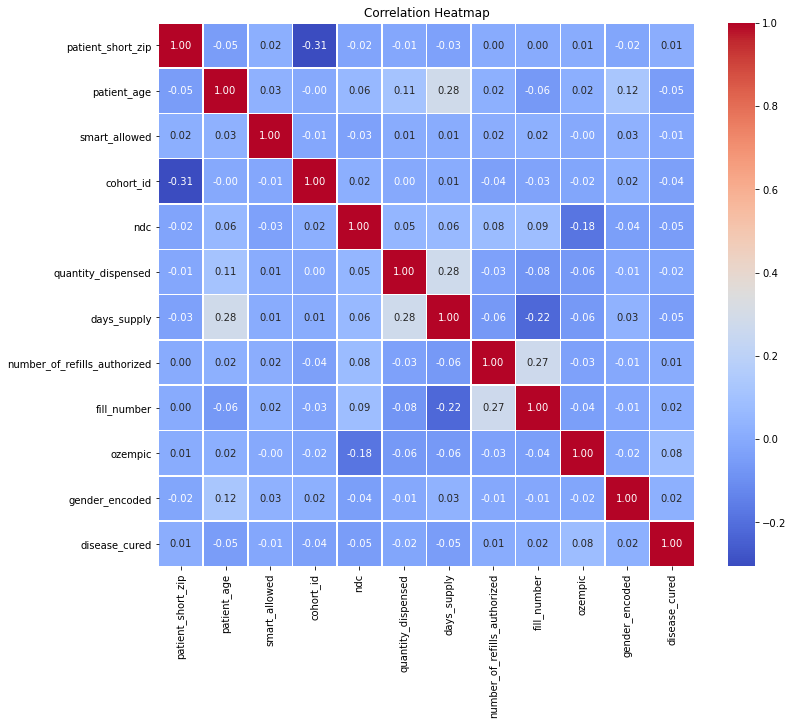

In [53]:
corr = sorted_combined_rows.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We will tackle the issue of endogeneity when estimating the impact of Ozempic, we'll use a method called Double Lasso. First, we'll use Lasso regression to predict who gets Ozempic based on factors like age, gender, and other health indicators. This helps us pick out the important factors and reduce any bias in our analysis. Next, we'll use another Lasso regression to see how Ozempic affects the outcome (like disease cure), while adjusting for any remaining biases from the first step. By doing this, we can better understand how Ozempic really works and make more accurate predictions about its effects on patients. This approach helps us deal with hidden factors that might influence both treatment and outcome, giving us more confidence in our results.

## Model Development: Double-Lasso / Treatment Effect Lasso to overcome issues of Endogenity 

In [77]:
from sklearn.preprocessing import LabelEncoder
## further encode the variables
# convert claim date to date
label_encoder = LabelEncoder()
sorted_combined_rows['claim_date'] = label_encoder.fit_transform(sorted_combined_rows['claim_date'])

# get dummy variables
df2 = pd.get_dummies(sorted_combined_rows,
                         columns=['patient_state','patient_short_zip',
                                  'cohort_id','is_compound_drug'], drop_first=True)

In [78]:
# drop encoded columns
df2 = df2.drop(['journey_id','episode_id','diag_list','proc_code',
          'ndc','diagnosis_code','diagnosis_code_type','patient_gender'],axis = 1)

In [79]:
df2.columns

Index(['claim_date', 'patient_age', 'smart_allowed', 'quantity_dispensed',
       'days_supply', 'number_of_refills_authorized', 'fill_number', 'ozempic',
       'gender_encoded', 'disease_cured', 'patient_state_AL',
       'patient_state_AZ', 'patient_state_CA', 'patient_short_zip_351.0',
       'patient_short_zip_612.0', 'patient_short_zip_852.0',
       'patient_short_zip_853.0', 'patient_short_zip_855.0',
       'patient_short_zip_856.0', 'patient_short_zip_857.0',
       'patient_short_zip_859.0', 'patient_short_zip_864.0',
       'patient_short_zip_900.0', 'patient_short_zip_908.0',
       'patient_short_zip_910.0', 'patient_short_zip_911.0',
       'patient_short_zip_912.0', 'patient_short_zip_913.0',
       'patient_short_zip_921.0', 'patient_short_zip_922.0',
       'patient_short_zip_995.0', 'patient_short_zip_996.0', 'cohort_id_17',
       'is_compound_drug_None'],
      dtype='object')

In [80]:
# First Lasso
X = df2.drop(columns=['ozempic','disease_cured'])  # Features
y = df2['ozempic']  # Target variable

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import pandas as pd
param_grid = {'alpha': np.logspace(-4, 2, 10)}  # Example range for alpha
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

Best alpha: 0.002154434690031882


In [82]:
lasso = Lasso(alpha=best_alpha)
from sklearn.feature_selection import SelectFromModel

# Fit the model
lasso.fit(X, y)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

                         Feature  Coefficient
0                     claim_date    -0.000025
1                    patient_age     0.000409
2                  smart_allowed    -0.000001
3             quantity_dispensed    -0.000054
4                    days_supply    -0.000231
5   number_of_refills_authorized    -0.000904
6                    fill_number    -0.003266
7                 gender_encoded    -0.000000
8               patient_state_AL    -0.000000
9               patient_state_AZ    -0.000000
10              patient_state_CA     0.000000
11       patient_short_zip_351.0    -0.000000
12       patient_short_zip_612.0    -0.000000
13       patient_short_zip_852.0    -0.000000
14       patient_short_zip_853.0    -0.000000
15       patient_short_zip_855.0    -0.000000
16       patient_short_zip_856.0    -0.000000
17       patient_short_zip_857.0    -0.000000
18       patient_short_zip_859.0    -0.000000
19       patient_short_zip_864.0    -0.000000
20       patient_short_zip_900.0  

In [83]:
predicted_ozempic = lasso.predict(X)
# Create a DataFrame with the predicted ozempic values
predicted_df = pd.DataFrame({'Predicted_ozempic': predicted_ozempic})
df2['lasso_pred_treatment']= predicted_ozempic

In [61]:
df2.columns

Index(['claim_date', 'patient_age', 'smart_allowed', 'quantity_dispensed',
       'days_supply', 'number_of_refills_authorized', 'fill_number', 'ozempic',
       'gender_encoded', 'disease_cured', 'patient_state_AL',
       'patient_state_AZ', 'patient_state_CA', 'patient_short_zip_351.0',
       'patient_short_zip_612.0', 'patient_short_zip_852.0',
       'patient_short_zip_853.0', 'patient_short_zip_855.0',
       'patient_short_zip_856.0', 'patient_short_zip_857.0',
       'patient_short_zip_859.0', 'patient_short_zip_864.0',
       'patient_short_zip_900.0', 'patient_short_zip_908.0',
       'patient_short_zip_910.0', 'patient_short_zip_911.0',
       'patient_short_zip_912.0', 'patient_short_zip_913.0',
       'patient_short_zip_921.0', 'patient_short_zip_922.0',
       'patient_short_zip_995.0', 'patient_short_zip_996.0', 'cohort_id_17',
       'is_compound_drug_None', 'lasso_pred_treatment'],
      dtype='object')

In [62]:
# create x and y variables
X_lasso = df2.drop(['disease_cured','ozempic'], axis=1).values
y_lasso = df2[['disease_cured']].values

In [63]:
df2.shape

(3763, 35)

In [64]:
## define the penalized double lasso function
class SelectiveRegularizationLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, penalty_indices, penalty_weights, tol=1e-4, max_iter=100):
        self.penalty_indices = penalty_indices
        self.penalty_weights = penalty_weights
        self.tol = tol
        self.max_iter = max_iter
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, coef, X, y):
        predictions = self._sigmoid(X @ coef)
        # Basic log loss
        basic_loss = log_loss(y, predictions)
        
        # Regularization term, selectively applied with L1 penalty
        reg_term = sum(self.penalty_weights[i] * abs(coef[self.penalty_indices[i]]) for i in range(len(self.penalty_indices)))
        
        return basic_loss + reg_term
    
    def fit(self, X, y):
        # Add intercept term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        initial_coef = np.zeros(X.shape[1])
        result = minimize(self._loss, initial_coef, args=(X, y), method='SLSQP', tol=self.tol, options={'maxiter': self.max_iter})
        
        self.coef_ = result.x
        return self
    
    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        proba = self._sigmoid(X @ self.coef_)
        return np.vstack([1-proba, proba]).T
    
    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)

In [65]:
df2.drop(['disease_cured'], axis=1).shape

(3763, 34)

In [66]:
df2['lasso_pred_treatment']

0       0.018573
1       0.012915
2       0.011118
3       0.011076
4       0.003219
          ...   
3758    0.021452
3759    0.011997
3760    0.010188
3761    0.018192
3762    0.016298
Name: lasso_pred_treatment, Length: 3763, dtype: float64

In [67]:
print("Shape of X_lasso:", X_lasso.shape)
print("Shape of y_lasso:", y_lasso.shape)

Shape of X_lasso: (3763, 33)
Shape of y_lasso: (3763, 1)


In [68]:
penalty_indices = [num for num in range(1,33)]  # Apply penalties to all coefficients except the treatment
penalty_weights = [0.2 if i not in penalty_indices else 0 for i in range(X_lasso.shape[1])]  # Penalty weights for these coefficients

model = SelectiveRegularizationLogisticRegression(penalty_indices=penalty_indices, penalty_weights=penalty_weights)

# Assuming y_lasso is a 2D array with shape (3759, 2) and you want to predict the first column
y_lasso_single = y_lasso[:, 0]  # Select the first column for prediction

# Proceed with fitting the model using the adjusted target
model.fit(X_lasso, y_lasso)

<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-i

<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-i

<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-i

<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-i

<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-i

<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-10ab41f7261f>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-i

SelectiveRegularizationLogisticRegression(penalty_indices=[1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                          penalty_weights=[0.2, 0, 0, 0, 0, 0,
                                                           0, 0, 0, 0, 0, 0, 0,
                                                           0, 0, 0, 0, 0, 0, 0,
                                                           0, 0, 0, 0, 0, 0, 0,
                                                           0, 0, 0, ...])

In [69]:
print("Coefficients for penalized features:", model.coef_)

Coefficients for penalized features: [ 0.01692554 -0.00044066 -0.04198753 -0.00028855 -0.00061796 -0.00578546
 -0.02277871 -0.01414176  0.11977908 -0.01503617 -0.00343514  0.03700675
 -0.01401333 -0.00745434 -0.00443136  0.00945081 -0.00041167 -0.00026626
 -0.0061478  -0.00049795 -0.00113277  0.13211153 -0.09245707  0.01699957
  0.01298996  0.05815155 -0.06084152 -0.26043548  0.23794172 -0.00070299
 -0.00090592 -0.07471624 -0.00207709  0.00052385]


In [70]:
df2.columns

Index(['claim_date', 'patient_age', 'smart_allowed', 'quantity_dispensed',
       'days_supply', 'number_of_refills_authorized', 'fill_number', 'ozempic',
       'gender_encoded', 'disease_cured', 'patient_state_AL',
       'patient_state_AZ', 'patient_state_CA', 'patient_short_zip_351.0',
       'patient_short_zip_612.0', 'patient_short_zip_852.0',
       'patient_short_zip_853.0', 'patient_short_zip_855.0',
       'patient_short_zip_856.0', 'patient_short_zip_857.0',
       'patient_short_zip_859.0', 'patient_short_zip_864.0',
       'patient_short_zip_900.0', 'patient_short_zip_908.0',
       'patient_short_zip_910.0', 'patient_short_zip_911.0',
       'patient_short_zip_912.0', 'patient_short_zip_913.0',
       'patient_short_zip_921.0', 'patient_short_zip_922.0',
       'patient_short_zip_995.0', 'patient_short_zip_996.0', 'cohort_id_17',
       'is_compound_drug_None', 'lasso_pred_treatment'],
      dtype='object')

In [71]:
# Define the feature names excluding the target variables
feature_names = ['intercept'] + df2.columns.tolist()[0:9] + df2.columns.tolist()[11:-2]

# Printing coefficients along with feature names
print("Coefficients for penalized features:")
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef}")

Coefficients for penalized features:
intercept: 0.016925540989323945
claim_date: -0.0004406596913753923
patient_age: -0.041987532258230084
smart_allowed: -0.00028855477734563486
quantity_dispensed: -0.0006179589078780228
days_supply: -0.00578546490271193
number_of_refills_authorized: -0.022778706138929204
fill_number: -0.014141758393478615
ozempic: 0.1197790847253079
gender_encoded: -0.015036168279527615
patient_state_AZ: -0.00343514204869354
patient_state_CA: 0.03700675224568488
patient_short_zip_351.0: -0.014013332187843702
patient_short_zip_612.0: -0.007454344191462424
patient_short_zip_852.0: -0.004431359692554127
patient_short_zip_853.0: 0.009450807201142022
patient_short_zip_855.0: -0.00041167171159729136
patient_short_zip_856.0: -0.00026625962207169345
patient_short_zip_857.0: -0.006147804111130274
patient_short_zip_859.0: -0.0004979469818323972
patient_short_zip_864.0: -0.0011327702100531816
patient_short_zip_900.0: 0.13211152652592986
patient_short_zip_908.0: -0.09245706937736

The outcome above depicts the treatment effect of Ozempic on disease cure, which stands at 0.1197790847253079, while adjusting for other potential variables that could introduce endogeneity - factors that are correlated with both the treatment and the dependent variable.

I included these covarites: 

1. Claim Date: Variation in the prescription claim date could introduce a time effect. Over time, several factors may change, such as the effectiveness of Ozempic.

2. Patient Background Information: This encompasses patient age, gender, location (state/zip code), and cohort. Each patient has a unique health condition. By controlling for these factors, we ensure that the impact of health conditions is isolated from the treatment effect.

3. Smart Allowed, Quantity Dispensed, Number of Refills: These variables serve as indicators of a patient's health condition. Generally, healthier patients require fewer smart allowances, lesser quantities of medicine dispensed, and fewer refills. Hence, controlling for these variables helps in managing the influence of patient health conditions.

4. Is Compound Drug: This factor accounts for the type of drug. By doing so, we can compare compound non-Ozempic drugs with compound Ozempic drugs, and non-compound non-Ozempic drugs with non-compound Ozempic drugs, thereby controlling for the drug's compoundness effect.

## Model Evaluation and Interpretation

Ozempic: This positive coefficient indicates that the presence of Ozempic treatment is associated with an increase in the outcome variable.

In [72]:
#evalutaing the performance of accuracy score
from sklearn.metrics import accuracy_score,mean_squared_error
predict_y = model.predict(X_lasso)
accuracy = accuracy_score(y_lasso,predict_y)
print("Accuracy Score:",accuracy)

Accuracy Score: 0.9473824076534679


In [73]:
#evalutaing the performance of accuracy score
mse = mean_squared_error(y_lasso, predict_y)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.05261759234653202


### The model achieved an MSE of 0.0526 and an Accuracy Score of 0.9474. These metrics indicate that the model's predictions are generally close to the actual values, with approximately 94.74% of instances correctly classified. Overall, the model performs well in predicting disease cure outcomes based on the provided features.

## Additional Insights


In [186]:
df2.columns

Index(['claim_date', 'patient_age', 'smart_allowed', 'quantity_dispensed',
       'days_supply', 'number_of_refills_authorized', 'fill_number', 'ozempic',
       'gender_encoded', 'disease_cured', 'patient_state_AL',
       'patient_state_AZ', 'patient_state_CA', 'patient_short_zip_351.0',
       'patient_short_zip_612.0', 'patient_short_zip_852.0',
       'patient_short_zip_853.0', 'patient_short_zip_855.0',
       'patient_short_zip_856.0', 'patient_short_zip_857.0',
       'patient_short_zip_859.0', 'patient_short_zip_864.0',
       'patient_short_zip_900.0', 'patient_short_zip_908.0',
       'patient_short_zip_910.0', 'patient_short_zip_911.0',
       'patient_short_zip_912.0', 'patient_short_zip_913.0',
       'patient_short_zip_921.0', 'patient_short_zip_922.0',
       'patient_short_zip_995.0', 'patient_short_zip_996.0', 'cohort_id_17',
       'is_compound_drug_None', 'lasso_pred_treatment'],
      dtype='object')

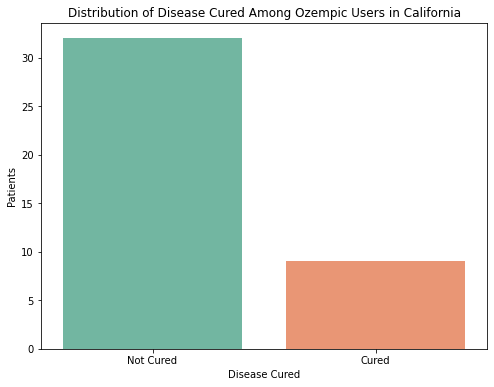

In [187]:
# Plotting the distribution of disease cured
california_ozempic_data = df2[(df2['patient_state_CA'] == 1) & (df2['ozempic'] == 1)]
plt.figure(figsize=(8, 6))
sns.countplot(x='disease_cured', data=california_ozempic_data, palette='Set2')
plt.title('Distribution of Disease Cured Among Ozempic Users in California')
plt.xlabel('Disease Cured')
plt.ylabel('Patients')
plt.xticks(ticks=[0, 1], labels=['Not Cured', 'Cured'])
plt.show()

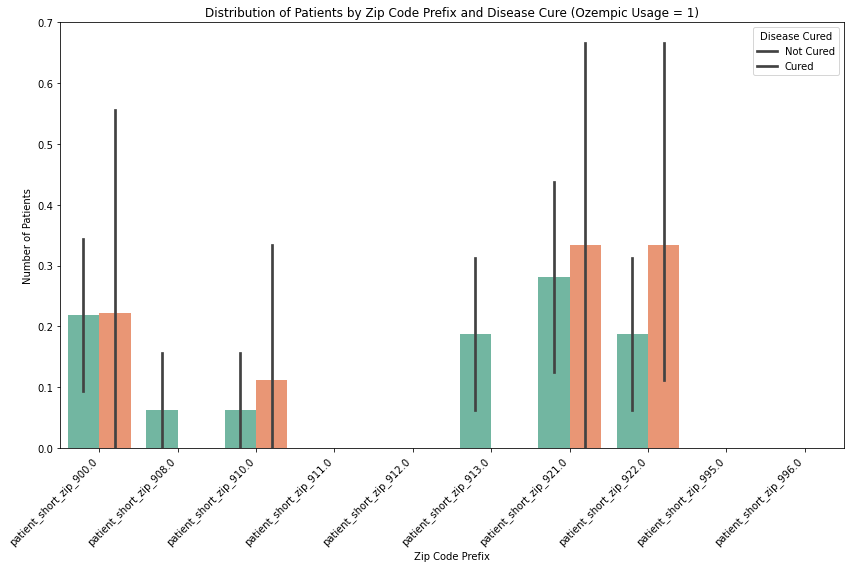

In [188]:
zip_columns = ['patient_short_zip_900.0', 'patient_short_zip_908.0', 'patient_short_zip_910.0', 
               'patient_short_zip_911.0', 'patient_short_zip_912.0', 'patient_short_zip_913.0', 
               'patient_short_zip_921.0', 'patient_short_zip_922.0', 'patient_short_zip_995.0', 
               'patient_short_zip_996.0']

plot_data = df2[df2['ozempic'] == 1][['disease_cured'] + zip_columns]
plot_data_melted = plot_data.melt(id_vars='disease_cured', var_name='Zip_Code', value_name='Patient_Count')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data_melted, x='Zip_Code', y='Patient_Count', hue='disease_cured', palette='Set2')
plt.title('Distribution of Patients by Zip Code Prefix and Disease Cure (Ozempic Usage = 1)')
plt.xlabel('Zip Code Prefix')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Disease Cured', loc='upper right', labels=['Not Cured', 'Cured'])
plt.tight_layout()
plt.show()

- 900 - Los Angeles
- 908 - Long Beach
- 910 - Atlana
- 913 - Agoura Hills , LA
- 921 - Sa Diego 
- 922 - Riverside 

From my opinion, most of zipcodes are in California who receive Ozempic with areas in with wealthy neighborhood and the influence of Hollywood on body images. I believe that has impacted the availability of Ozempic to them. Given, those disparities, disease cured in most patients when given ozempic is low, because maybe they are taking it only to have the effects of weightloss insead of diabetes. These patients have resources such as doctors who will and can prescribe ozempic for weight hence impacting our analysis of seeing the real impact of ozempic. 

Within the dataset, there's an overrepresentation of individuals residing in affluent regions. This demographic might be utilizing Ozempic for reasons unrelated to hypertension or obesity, introducing the challenge of selection bias.The lack of clarity regarding whether individuals are using the medication for its intended purpose or for its secondary effects contributes to an ill-defined treatment group.To address this concern, stratifying the treatment group based on geographical location could offer valuable insights.